In [1]:
from numpy import *
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
random.seed(123456)
N = 500
K = 4
X = ones((N,K))
X[:,1:K]=random.randn(N,K-1)
eps = random.randn(N)
true_beta = array([-.12, .89, -.72, .50])
# please note that if I don't convert the data from boolean to float
# the regresion somehow messed up.
Z = (matmul(X,true_beta) + eps >0).astype(float)
Y = (Z>0).astype(float)
nrep = 10000
burnin = 1000
# inverse of prior variance for beta
B0 = identity(K)*.01
xi = mean(X, axis = 0)
XX = matmul(transpose(X),X)
XX_inv = linalg.inv(XX)
pos = Y>0
neg = Y<=0
no_pos = sum(pos)
no_neg = sum(neg)
tau = 1
sig = linalg.inv(XX+B0)
beta = zeros((nrep,K))

In [3]:
# Gibb sampling
for i in range(1,nrep):
    b_mean = matmul(sig, tau*matmul(transpose(X),Z))
    beta[i,:] = random.multivariate_normal(b_mean, sig)
    mu = matmul(X,beta[i,:])
    # A and B are just some operations to simplify the operations pf Z
    A = ones(no_pos) - norm.cdf(-mu[pos])
    B = random.rand(no_pos)
    Z[pos] = norm.ppf(multiply(A,B) +norm.cdf(-mu[pos])) +mu[pos]
    A = random.rand(no_neg)
    B = norm.cdf(-mu[neg])
    Z[neg] = norm.ppf(multiply(A,B))+mu[neg]

In [4]:
mean(beta[burnin:nrep,:], axis = 0)

array([-0.2001601 ,  0.95519733, -0.68971489,  0.41907307])

In [5]:
std(beta[burnin:nrep,:], axis=0)

array([ 0.06963436,  0.08798751,  0.07942056,  0.07524416])

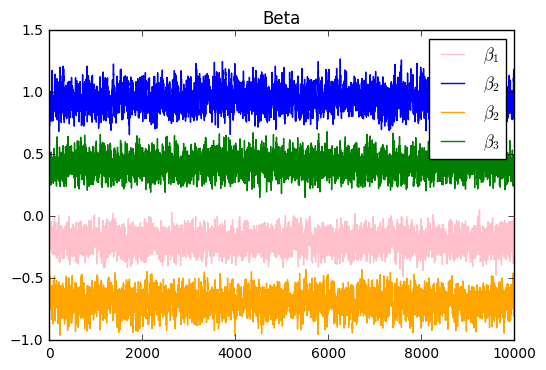

In [11]:
%matplotlib inline
plt.plot(beta[:,0], label=r'$\beta_1$', c='pink')
plt.plot(beta[:,1], label=r'$\beta_2$', c='blue')
plt.plot(beta[:,2], label=r'$\beta_2$', c='orange')
plt.plot(beta[:,3], label=r'$\beta_3$', c='green')
plt.title('Beta')
plt.legend()
plt.savefig('probit_sim.png')
plt.show()

In [8]:
b = mean(beta[burnin:nrep,:], axis = 0)
z_pred = matmul(X,b)
y_pred = (z_pred>0).astype(float)
print("Correct classification", sum(y_pred==Y)/len(Y)*100, "%")

Correct classification 78.4 %
